---
# Setup
---

## Imports

In [1]:
import numpy as np
import pandas as pd
import glob

import matplotlib.pyplot as plt 
%matplotlib inline 

---
# Trial Data
---

## Load and manipulate data

Path to `trial_data`

In [99]:
root_dir = '/Volumes/DJW_Lacie_01/PROJECTS/2018_Food_Reg_fMRI/09_DATA/food_reg_fmri_01/'

Only **good subjects** were included in analyses

In [100]:
good_subjects = list(range(101,105)) + list(range(106,113)) + [114, 116] + list(range(118,122)) + list(range(123,127)) + list(range(129,138)) + [139, 140] + list(range(142,149)) + [150] + list(range(152,159)) + list(range(162,165))
all_subjects = list(range(101,165)) 

Limit to subjects that have localizer data

In [101]:
# No localizer data for subs 101, 117, 132, 138, 141, 151
no_localizer_subs = [101,117,132,138,141,151]
all_subjects = list(set(all_subjects) - (set(no_localizer_subs)))
good_subjects = list(set(good_subjects) - (set(no_localizer_subs)))

In [102]:
good_subjects = np.sort(good_subjects)

### Create Localizer DFs

In [103]:
gng_df = []
switch_df = []

# loop through csv files
for subject in good_subjects:
    
    sub_dir = root_dir + 'trial_data/' + str(subject) + '/'
    
    # get list of files
    gng = glob.glob(sub_dir + '*gonogo.csv')
    switch = glob.glob(sub_dir + '*shiftingLetterNumber.csv')
    
    # append gng runs
    gng_sub = []
    run = 1
    for file in gng:
        df = pd.read_csv(file)
        df['run'] = run
        gng_sub.append(df)
        run+=1
        
    gng_sub = pd.concat(gng_sub, axis=0).reset_index(drop=True)
    gng_df.append(gng_sub)
    
    # only one switch run
    switch_sub = pd.read_csv(switch[0])
    switch_df.append(switch_sub)

# join all subjects
gng_df = pd.concat(gng_df, axis=0).reset_index(drop=True)
switch_df = pd.concat(switch_df, axis=0).reset_index(drop=True)

In [104]:
switch_df.columns

Index(['participant', 'scriptDate', 'trialNo', 'blockType', 'task',
       'fixationFrames', 'postFixationFrames', 'targetFrames', 'startTime',
       'endTime', 'firstTR', 'blockNumber', 'elapsedTime', 'resp', 'rt', 'iti',
       'responseTTL', 'choice', 'overallTrialNum', 'acc', 'creditsEarned',
       'letternumber', 'trials', 'switchProportion', 'switches', 'switch',
       'question', 'colourCue', 'correctAnswer', 'correctKey'],
      dtype='object')

---
### Basic Pyschometrics

In [9]:
# rt and accuracy for each subject
switch_df.groupby('participant')[['rt', 'acc']].mean().head()

,rt,acc
participant,,
102,0.703756,0.6375
103,0.578992,0.3625
104,0.843213,0.3000
106,0.787512,0.6000
107,0.748620,0.6750


In [10]:
# more accurate on faces than houses
switch_df.groupby('correctAnswer')[['rt', 'acc']].mean()

,rt,acc
correctAnswer,,
female,0.670152,0.605025
male,0.697437,0.542888
new,0.693298,0.389006
old,0.702082,0.401840


In [11]:
# much worse accuracy when switching
switch_df.groupby('switch')[['rt', 'acc']].mean()

,rt,acc
switch,,
0,0.678389,0.551042
1,0.702879,0.419271


## Stimulus Presentations

In [166]:
switch_df.columns

Index(['participant', 'scriptDate', 'trialNo', 'blockType', 'task',
       'fixationFrames', 'postFixationFrames', 'targetFrames', 'startTime',
       'endTime', 'firstTR', 'blockNumber', 'elapsedTime', 'resp', 'rt', 'iti',
       'responseTTL', 'choice', 'overallTrialNum', 'acc', 'creditsEarned',
       'letternumber', 'trials', 'switchProportion', 'switches', 'switch',
       'question', 'colourCue', 'correctAnswer', 'correctKey'],
      dtype='object')

### Missed Trials

In [167]:
missed_trials = switch_df.resp.isnull().sum()
total_trials = len(switch_df.trialNo)

print('{} total trials.\n{} trials missed.\n\nResponses for {:.2f}% of all trials'.
      format(total_trials, missed_trials,(1-missed_trials/total_trials)*100))

3840 total trials.
827 trials missed.

Responses for 78.46% of all trials


---
## Timing
---

### First TR & Start Time
---

In [168]:
switch_df.loc[switch_df.trialNo==1, ['firstTR', 'startTime']].head()

,firstTR,startTime
0,11.223341,17.227076
80,11.767859,17.771577
160,38.789602,44.794762
240,0.000846,19.777737
320,16.502568,22.511289


In [169]:
# first TR seems to be about 6 seconds (3TRs before first trial)
np.array(switch_df.loc[switch_df.trialNo==1,:].startTime[0:10])\
- np.array(switch_df.loc[switch_df.trialNo==1,:].firstTR[0:10])

array([ 6.00373474,  6.00371812,  6.00515963, 19.77689017,  6.00872083,
        6.00303563,  6.00784353,  6.00378465,  6.00206359,  6.00937048])

---
### Check Run Timing
---

In [170]:
# 101 did NOT do localizer
participant_num = 102

print("Start Times")
print(list(switch_df.loc[switch_df.participant==participant_num, 'startTime'])[0:5])

print("\nDurations")
print(list(switch_df.loc[switch_df.participant==participant_num, 'endTime'][0:5] - switch_df.loc[switch_df.participant==participant_num, 'startTime'][0:5]))

print("\nITI Duration")
print(list(switch_df.loc[switch_df.participant==participant_num, 'iti'])[0:5])

print("\nCalculated Duration")
print(list(switch_df.loc[switch_df.participant==participant_num, 'iti'][0:5] \
           + switch_df.loc[switch_df.participant==participant_num, 'endTime'][0:5]\
           - switch_df.loc[switch_df.participant==participant_num, 'startTime'][0:5]))

print("\nActual Duration")
print(list(np.array(switch_df.loc[switch_df.participant==participant_num, 'startTime'][1:6])\
           - np.array(switch_df.loc[switch_df.participant==participant_num, 'startTime'][0:5])))


Start Times
[17.227075865692314, 22.325896539383393, 27.425062552829328, 33.52433864492559, 35.623429651295744]

Durations
[1.100010803067562, 1.1000105470702692, 1.1000105470702728, 1.100014899016962, 1.1000123390476801]

ITI Duration
[4.0, 4.0, 5.0, 1.0, 4.0]

Calculated Duration
[5.100010803067562, 5.100010547070269, 6.100010547070273, 2.100014899016962, 5.10001233904768]

Actual Duration
[5.09882067369108, 5.0991660134459345, 6.0992760920962645, 2.099091006370152, 5.099223356744901]


In [171]:
# difference between calculated and actual
np.array([5.100010803067562, 5.100010547070269, 6.100010547070273, 2.100014899016962, 5.10001233904768])\
- np.array([5.09882067369108, 5.0991660134459345, 6.0992760920962645, 2.099091006370152, 5.099223356744901])

array([0.00119013, 0.00084453, 0.00073445, 0.00092389, 0.00078898])

# Load Neural Data

In [12]:
import os
import nibabel as nib

In [19]:
anat = nib.load(os.path.join(root_dir, 'derivatives','fmriprep','sub-102', 'anat',
                             'sub-102_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'))

In [34]:
bold = nib.load(os.path.join(root_dir, 'derivatives','fmriprep','sub-102', 'func',
                             'sub-102_task-choose_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz'))

In [35]:
anat.shape

(193, 229, 193)

In [40]:
bold.shape

(97, 115, 97, 130)

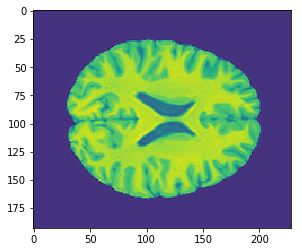

In [38]:
plt.imshow(anat.get_data()[:,:,100]);

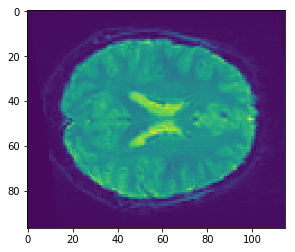

In [39]:
plt.imshow(bold.get_data()[:,:,50,50]);

In [23]:
print(data.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 193 229 193   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'xform matrices modified by FixHeaderRegistration (niworkflows v0.5.1).'
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -96.0
qoffset_y       : -132.0
qoffset_z

In [26]:
data.affine

array([[   1.,    0.,    0.,  -96.],
       [   0.,    1.,    0., -132.],
       [   0.,    0.,    1.,  -78.],
       [   0.,    0.,    0.,    1.]])

In [27]:
from nilearn.plotting import view_img, glass_brain, plot_anat, plot_epi

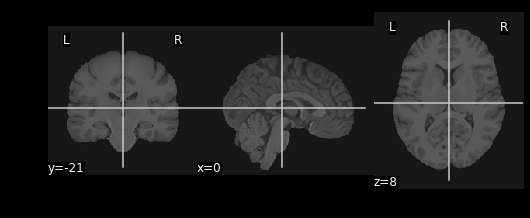

In [29]:
plot_anat(anat);

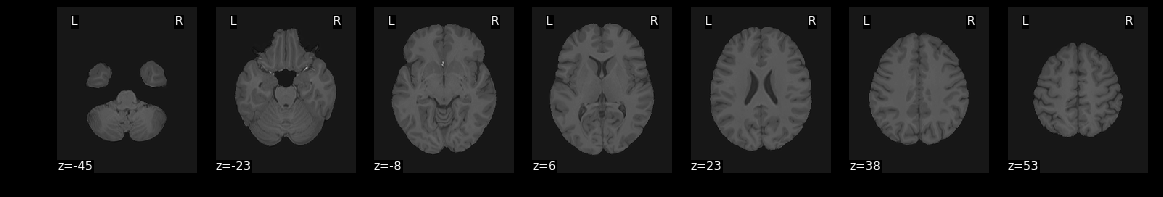

In [31]:
plot_anat(anat, draw_cross=False, display_mode='z');

In [33]:
# Interactive Viewer
view_img(anat)

# To Dos

> Need to align TRs with trial data
> 1. Start time of each trial
> 2. End time of each trial
> 3. ITI duration

In [172]:
switch_df.head()

,participant,scriptDate,trialNo,blockType,task,fixationFrames,postFixationFrames,targetFrames,startTime,endTime,...,creditsEarned,letternumber,trials,switchProportion,switches,switch,question,colourCue,correctAnswer,correctKey
0,102,2018_06_27,1,actual,shiftingLetterNumber,30,NaN,120,17.227076,18.327087,...,0,p1,80,0.5,40,0,face,blue,male,2
1,102,2018_06_27,2,actual,shiftingLetterNumber,30,NaN,120,22.325897,23.425907,...,0,p7,80,0.5,40,1,house,white,new,3
2,102,2018_06_27,3,actual,shiftingLetterNumber,30,NaN,120,27.425063,28.525073,...,0,p1,80,0.5,40,0,house,white,old,4
3,102,2018_06_27,4,actual,shiftingLetterNumber,30,NaN,120,33.524339,34.624354,...,0,f1,80,0.5,40,0,house,white,old,4
4,102,2018_06_27,5,actual,shiftingLetterNumber,30,NaN,120,35.623430,36.723442,...,0,o1,80,0.5,40,0,house,white,old,4


---
## get number of TRs from confounds file
---

### Switch

In [105]:
TR_num = np.zeros((len(good_subjects), 2))

i = 0
for sub in good_subjects:
    df = pd.read_csv(root_dir + 'derivatives/fmriprep/sub-' + str(sub) + '/func/sub-' + str(sub) +\
                     '_task-switch_desc-confounds_regressors.tsv', sep="\t")
    TR_num[i,0] = sub
    TR_num[i,1] = (df.shape[0])
    i+=1
    

In [106]:
TR_num_df = pd.DataFrame(TR_num, columns=['participant', 'TR_num'], dtype=int)

In [107]:
switch_df = pd.merge(switch_df,
                     TR_num_df,
                     on='participant')

In [108]:
switch_df.head()

,participant,scriptDate,trialNo,blockType,task,fixationFrames,postFixationFrames,targetFrames,startTime,endTime,...,letternumber,trials,switchProportion,switches,switch,question,colourCue,correctAnswer,correctKey,TR_num
0,102,2018_06_27,1,actual,shiftingLetterNumber,30,NaN,120,17.227076,18.327087,...,p1,80,0.5,40,0,face,blue,male,2,185
1,102,2018_06_27,2,actual,shiftingLetterNumber,30,NaN,120,22.325897,23.425907,...,p7,80,0.5,40,1,house,white,new,3,185
2,102,2018_06_27,3,actual,shiftingLetterNumber,30,NaN,120,27.425063,28.525073,...,p1,80,0.5,40,0,house,white,old,4,185
3,102,2018_06_27,4,actual,shiftingLetterNumber,30,NaN,120,33.524339,34.624354,...,f1,80,0.5,40,0,house,white,old,4,185
4,102,2018_06_27,5,actual,shiftingLetterNumber,30,NaN,120,35.623430,36.723442,...,o1,80,0.5,40,0,house,white,old,4,185


#### Plot Conditions

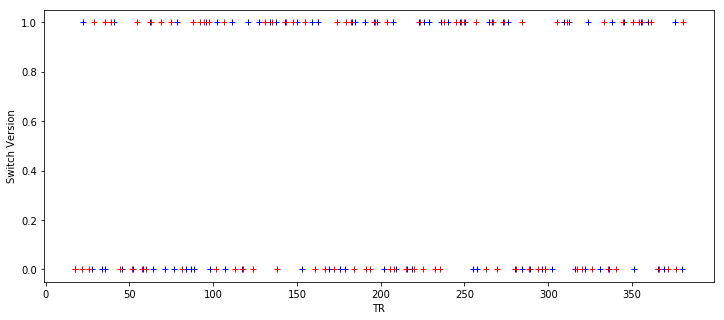

In [128]:
# plot conditions
sub = 102

f, ax = plt.subplots(1,1, figsize = (12,5))

ax.plot('startTime', 'switch', 'b+', data=switch_df[switch_df.participant==102]);
ax.plot('startTime', 'switch', 'r+', data=switch_df[switch_df.participant==103])

ax.set_ylabel('Switch Version')
ax.set_xlabel('TR');

### GoNoGo

In [109]:
TR_num = np.zeros((len(good_subjects), 2))

i = 0
for sub in good_subjects:
    df = pd.read_csv(root_dir + 'derivatives/fmriprep/sub-' + str(sub) + '/func/sub-' + str(sub) +\
                     '_task-gonogo_run-01_desc-confounds_regressors.tsv', sep="\t")
    TR_num[i,0] = sub
    TR_num[i,1] = df.shape[0] * 2
    i+=1

In [110]:
TR_num_df = pd.DataFrame(TR_num, columns=['participant', 'TR_num'], dtype=int)

In [111]:
gng_df = pd.merge(gng_df,
                  TR_num_df,
                  on='participant')

In [112]:
gng_df.head()

,stimulus,trialType,TTLStim,participant,trialNo,blockType,noGoFreq,goLetter,task,fixationFrames,...,elapsedTime,resp,rt,iti,responseTTL,choice,overallTrialNum,acc,run,TR_num
0,w,go,11,102,1,actual,low,w,gonogo,58,...,NaN,1.0,0.342222,1.0,15.0,NaN,1,1.0,1,190
1,w,go,11,102,2,actual,low,w,gonogo,58,...,NaN,1.0,0.283930,1.0,15.0,NaN,2,1.0,1,190
2,m,nogo,12,102,3,actual,low,w,gonogo,58,...,NaN,NaN,NaN,1.0,19.0,NaN,3,1.0,1,190
3,w,go,11,102,4,actual,low,w,gonogo,58,...,NaN,1.0,0.275594,1.0,15.0,NaN,4,1.0,1,190
4,w,go,11,102,5,actual,low,w,gonogo,58,...,NaN,1.0,0.342222,1.0,15.0,NaN,5,1.0,1,190


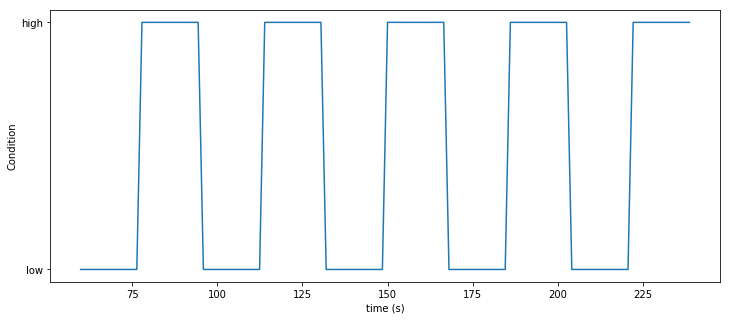

In [127]:
# plot conditions
sub = 102

f, ax = plt.subplots(1,1, figsize = (12,5))

ax.plot('startTime', 'noGoFreq', data=gng_df[(gng_df.participant==103) & (gng_df.run==1)])
#ax.plot('startTime', 'noGoFreq', data=gng_df[(gng_df.participant==104) & (gng_df.run==1)])

ax.set_ylabel('Condition')
ax.set_xlabel('time (s)');

In [67]:
# Load a bold run...count TRs (for bot tasks)

In [ ]:
# GLM
    # beta per condition per participant, per run? Or just per participant, per  bcondition?
    # Highest Power (avoids slow and fast noise):
        # blocks between 16-24 seconds
        # repeat at least 4 times within 5 min run
    
# minimum: regressor for each condition
# plus nuisance regressors

# ARTIFACTS
    ## e.g. sneeze: whole image goes bright
    ## fit one time point, amplitude corresponding to value of spike
    

In [ ]:
# Univariate analysis
    ## Subject
        ## GLM (calculate beta)
        ## Calculate contrasts
    ## Whole brain Group analysis
        ## Compare contrasts across subjects (t-map), average the magnitude accounting for variance
        
# FUNCTIONAL LOCALIZATION/ROI SELECTION



---
# Multivariate Analysis
---
* Voxels = points in multidimensional space based on beta values
* Don't see spatial relationships anymore...
* 50-100 voxels typically

## Can be done using:
* **A priori feature selection (or functional localizer)**
    * anatomy
    * function (contiguous regions w/ large response in contrast)
    * function (pick n, f-value)
* **searchlight**
    
## Use cases
* Classification
* Generalization
     * Near/Far
* Representational Dissimilarity Matrix
    
    
## MVPA Questions
* **Which Voxels?**
    * Relevant unit of analysis
        * Local region
        * Functional network 
            * Does not have to be continuous (e.g. right and left amygdala)
        * Info could be completely non-local!!

## Good to constrain area of analysis...
* becuase larger number of dimensions increases noise...higher rise of overfitting...
* in fMRI we have many dimensions in comparison to data points...
* 100 voxels a bit of a rule of thumb...
* Can also classify as a function of the number of features!

# Cross validation
* Typically use runs for folds
    * Runs should have equal numbers of each condition/stim

---
# Representational Similarity
---
[Saxe Tutorial](https://cbmm.mit.edu/video/fmri-bootcamp-part-7-representational-similarity-4755)
* Essentially same as classification except with more than two conditions

## What is a question that we could ask with a RSD 
(think about features...amount, tasty/healthy, pre-liking)

* Regulatory conditions more similar than natural conditions in the two brain areas Cendri found
* RSA of healthy/tasty, healthy/untasty, unhealthy/tasty, unhealthy/untasty
    * tasty stronger than healthy...OR healthy stronger than tasty?
        * look by condition
        * look by subject

## Analysis
* Fit by participant
    * Calculate stats across participants (convert r to z score)
* Different brain regions could better match different RSM models
* Diagonal can be seen as a "noise ceiling"

---
# Multiple Comparisons
---

[Saxe Tutorial](https://cbmm.mit.edu/video/fmri-bootcamp-part-8-fmri-multiple-comparisons-12613)

## Non Parametric
Only **valid** technique

* Multiply contrast image randomly (50% on average) by -1
    * creates a null dataset on average
* Create t-map from random contrasts, ITERATE (e.g. 1000x)



In [ ]:
# find regions based on previous papers
# then SNR to determine voxels

# if you have 6 regions you then need to correct for 6 tests
    ## can any regions successfully classify? (correct for 6 tests)
    ## can any regions generalize? (correct for number of those that successfully classified)

# Predict switch/non switch

# Predict go/nogo